In [15]:
import pandas as pd
import sys
sys.path.append('..')
from filenames import load_inst_info
import numpy as np
import os
from numpy.ma import masked_array
from scipy.stats import describe

**Plotting imports**

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Body

In [3]:
inst_info = load_inst_info()

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
inst_info = inst_info[inst_info['pert_type'].isin({'trt_cp', 'ctl_vehicle'})]

In [5]:
counts = inst_info.groupby(['pert_id', 'cell_id']).size()
print(f"Number of unique perturbation/cell type pairs: {len(counts)}")

Number of unique perturbation/cell type pairs: 116972


In [23]:
sorted_celltypes = counts.groupby('cell_id').size().sort_values(ascending=False)
print(f"Number of cell types: {len(sorted_celltypes)}")
print(describe(sorted_celltypes))
print(sorted_celltypes.head(5))
print(sorted_celltypes.tail(5))

Number of cell types: 71
DescribeResult(nobs=71, minmax=(1, 15805), mean=1647.4929577464789, variance=11687828.0249497, skewness=2.708920099384879, kurtosis=6.275815063686556)
cell_id
VCAP    15805
A549    12499
A375    11337
MCF7    11268
PC3     11152
dtype: int64
cell_id
HEK293T    38
JURKAT     32
U266       32
HS27A      13
MCH58       1
dtype: int64


In [22]:
sorted_perturbations = counts.groupby('pert_id').size().sort_values(ascending=True)
print(f"Number of perturbations: {len(sorted_perturbations)}")
print(describe(sorted_perturbations))
sorted_perturbations.tail()

Number of perturbations: 20369
DescribeResult(nobs=20369, minmax=(1, 70), mean=5.742648141784084, variance=54.737576667283584, skewness=4.519449148782926, kurtosis=25.55740588504053)


pert_id
BRD-A19500257    61
BRD-K56343971    61
BRD-A75409952    61
BRD-A19037878    64
DMSO             70
dtype: int64

In [8]:
pert2ix = {pert: ix for ix, pert in enumerate(sorted_perturbations.index)}
cell2ix = {cell: ix for ix, cell in enumerate(sorted_celltypes.index)}
pert_ixs, cell_ixs = counts.index.get_level_values('pert_id').map(pert2ix), counts.index.get_level_values('cell_id').map(cell2ix)

In [9]:
count_matrix = np.zeros((len(sorted_perturbations), len(sorted_celltypes)))
count_matrix[pert_ixs, cell_ixs] = counts.values
masked_count_matrix = masked_array(count_matrix, count_matrix==0)

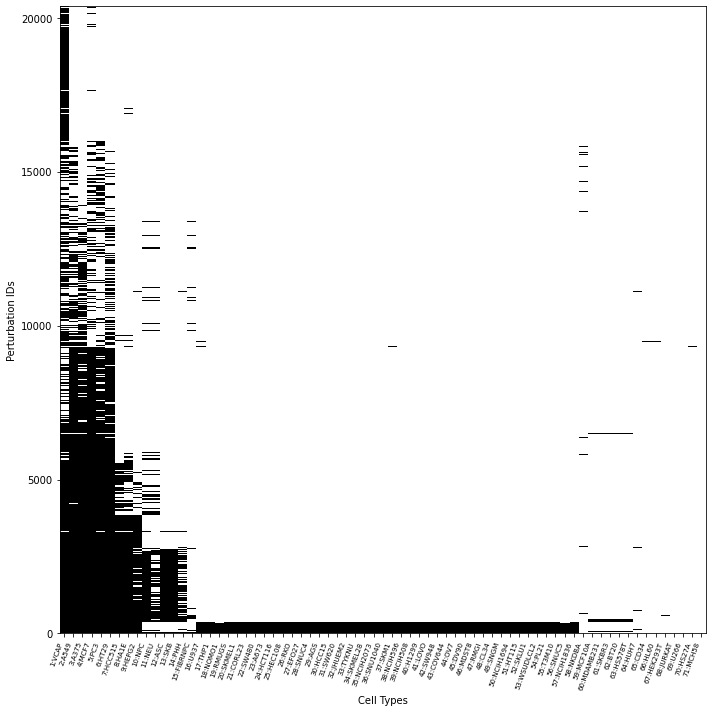

In [10]:
sns.reset_orig()
plt.figure(figsize=(10, 10));

LOG2 = False
if LOG2:
    plt.imshow(np.log2(count_matrix+1), aspect='auto', interpolation='none', cmap='binary');
else:
    plt.imshow(count_matrix != 0, aspect='auto', interpolation='none', cmap='binary');
plt.xlabel("Cell Types");
plt.ylabel("Perturbation IDs");
plt.xticks(list(range(len(sorted_celltypes))));
plt.yticks(list(reversed(range(len(sorted_perturbations), 0, -5000))), list(reversed(range(0, len(sorted_perturbations), 5000))));
ax = plt.gca()
ax.tick_params(axis='y', left=True, right=False, labelleft=True, labelright=False)
ax.tick_params(axis='x', bottom=True, top=False, labelbottom=True, labeltop=False, labelsize='x-small')
ax.set_xticklabels([str(ix+1)+":"+ct for ix, ct in enumerate(sorted_celltypes.index)], ha='right', rotation=70);
plt.tight_layout()
plt.savefig(os.path.join('figures', f'{"log2_" if LOG2 else ""}count_matrix.png'))

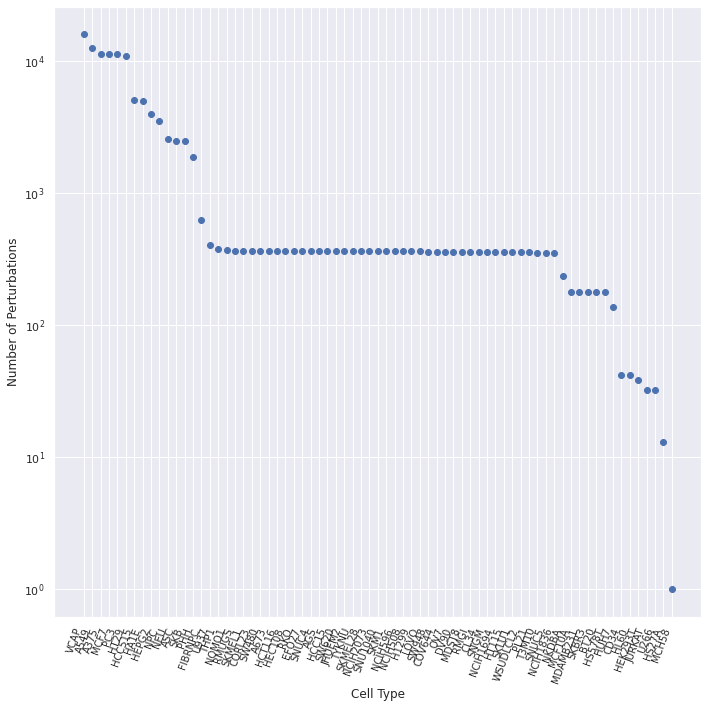

In [11]:
sns.set()
plt.figure(figsize=(10, 10))
plt.scatter(list(range(len(sorted_celltypes))), (count_matrix != 0).sum(axis=0));
plt.ylabel('Number of Perturbations')
plt.xlabel('Cell Type');
plt.yscale('log')
plt.xticks(list(range(len(sorted_celltypes))));
ax = plt.gca()
ax.tick_params(axis='x', bottom=False, top=False, labelsize='small')
ax.set_xticklabels(sorted_celltypes.index, ha='right', rotation=70);
plt.tight_layout()
plt.savefig(os.path.join('figures', 'sorted_celltypes.png'))

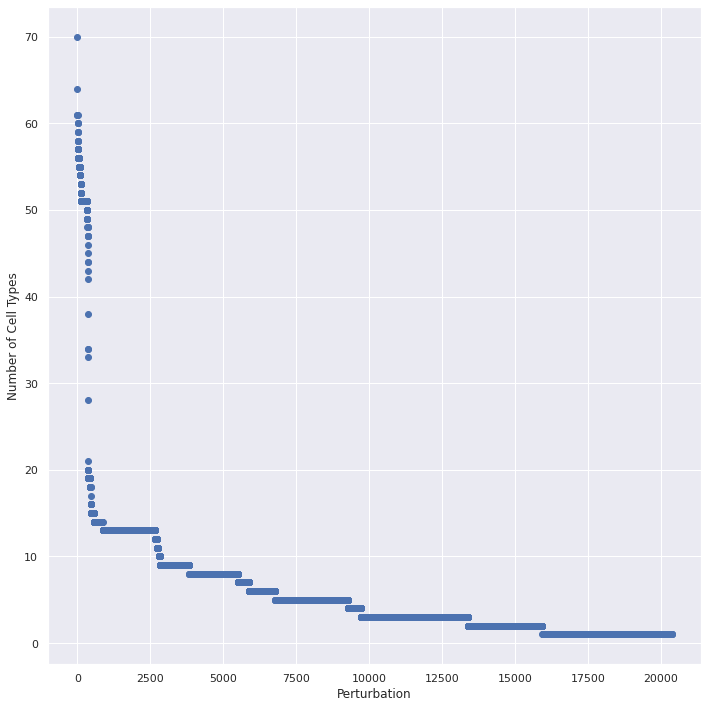

In [12]:
sns.set()
plt.figure(figsize=(10, 10))
plt.scatter(list(range(len(sorted_perturbations))), list(reversed(sorted_perturbations.values)));
plt.ylabel('Number of Cell Types')
plt.xlabel('Perturbation');
plt.tight_layout()
plt.savefig(os.path.join('figures', 'sorted_perturbations.png'))

In [37]:
dmso_celltypes = set(counts[counts.index.get_level_values('pert_id') == 'DMSO'].index.get_level_values('cell_id'))

In [38]:
set(sorted_celltypes.index) - dmso_celltypes

{'MCH58'}

In [39]:
counts[counts.index.get_level_values('cell_id') == 'MCH58']

pert_id              cell_id
CMAP-T2DTUNICAMYCIN  MCH58      22
dtype: int64